In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
!pip install plotly


import os
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls




from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

You should consider upgrading via the 'c:\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:

TRM=pd.read_csv("Trainmatches.csv")
TRM.index=TRM["id"]
TRD=pd.read_csv("TrainDeliveries.csv")

In [3]:
TRM.head()

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,1,2017,City1,Team1,Team5,Team5,field,normal,0,Team1,35,0,Player 467,Stadium1
2,2,2017,City2,Team2,Team4,Team4,field,normal,0,Team4,0,7,Player 405,Stadium2
3,3,2017,City3,Team3,Team6,Team6,field,normal,0,Team6,0,10,Player 85,Stadium3
4,4,2017,City4,Team4,Team8,Team8,field,normal,0,Team8,0,6,Player 145,Stadium4
5,5,2017,City5,Team5,Team7,Team5,bat,normal,0,Team5,15,0,Player 209,Stadium5


In [4]:
matches_played_byteams=pd.concat([TRM['team1'],TRM['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=TRM['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches'
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


In [5]:

FT=pd.DataFrame()


FT["match_id"]=TRM["id"]
FT.index=FT["match_id"]

print('Total Matches Played:',TRM.shape[0])

Total Matches Played: 500


In [6]:

FT["Team A"]=TRM["team1"]
FT["Team B"]=TRM["team2"]
FT = FT.drop('match_id', 1)
print('Teams:',FT['Team A'].unique())

Teams: ['Team1' 'Team2' 'Team3' 'Team4' 'Team5' 'Team6' 'Team7' 'Team8' 'Team10'
 'Team9' 'Team11']


<Figure size 576x288 with 0 Axes>

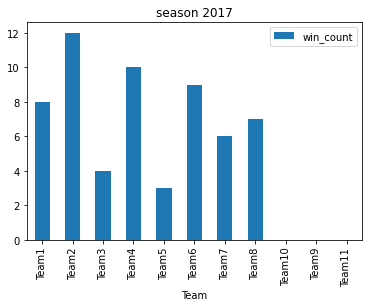

<Figure size 576x288 with 0 Axes>

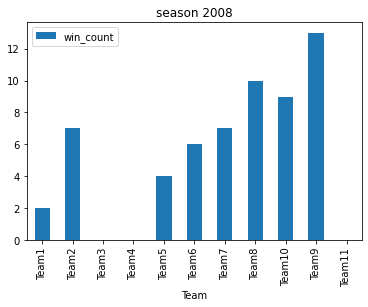

<Figure size 576x288 with 0 Axes>

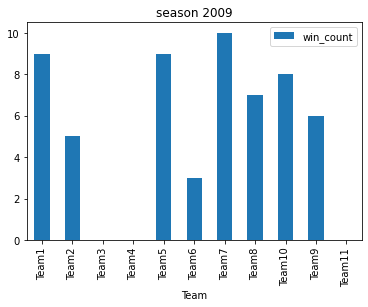

<Figure size 576x288 with 0 Axes>

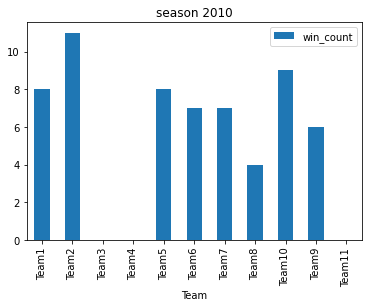

<Figure size 576x288 with 0 Axes>

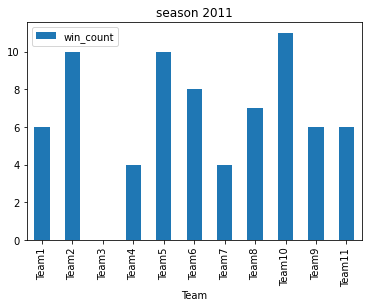

<Figure size 576x288 with 0 Axes>

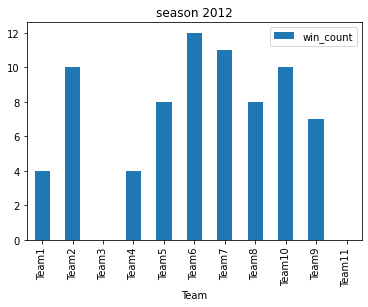

<Figure size 576x288 with 0 Axes>

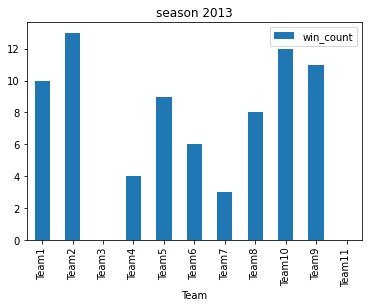

<Figure size 576x288 with 0 Axes>

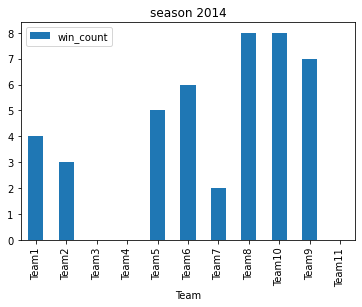

In [7]:

FT["season"]=TRM["season"]
FT["winner"]=TRM["winner"]


season_list=FT['season'].unique()
team_list=FT['Team A'].unique()



temp_data=pd.DataFrame()  
temp_data["Team"]=team_list
temp_data.index=temp_data["Team"]

for s in season_list:
    winner_season=FT.loc[FT['season']== s,"winner"] 
    t=winner_season.value_counts() 
    t=t.to_frame() 
    temp_data["win_count"]=t["winner"] 
    temp_data['win_count']=temp_data['win_count'].fillna(0)
    temp_data['win_count']=temp_data['win_count'].astype(int)
    tit="season "+str(s)
    fig = plt.figure(figsize=(8,4))
    temp_data.plot(kind='bar',title=tit)

In [8]:
FT = FT.drop('winner', 1)

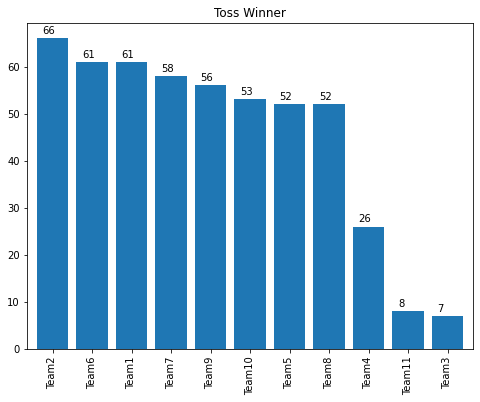

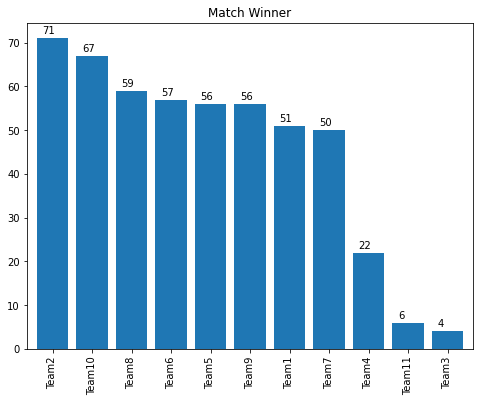

In [9]:
teams=['Team1','Team2','Team3','Team4','Team5','Team6','Team7','Team8','Team9','Team10','Team11']
t=pd.Series(teams)

temp_toss_winner=pd.DataFrame()
temp_toss_winner['Team']=t.values
temp_match_winner=pd.DataFrame()
temp_match_winner['Team']=t.values

temp_toss_winner['Count'] = temp_toss_winner['Team'].map(TRM['toss_winner'].value_counts())
temp_match_winner['Count']=temp_match_winner['Team'].map(TRM['winner'].value_counts())

plt.subplots(figsize=(8,6))
ax=TRM['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Toss Winner")
plt.show()

plt.subplots(figsize=(8,6))
ax=TRM['winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Match Winner")
plt.show()

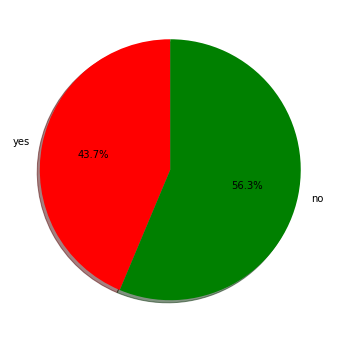

In [10]:
df=TRM[TRM['toss_winner']==TRM['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [11]:

FT["toss_winner"]=TRM["toss_winner"]

In [12]:

dl=TRM.loc[TRM['dl_applied'] == 1]
dl

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
57,57,2017,City5,Team1,Team6,Team6,field,normal,1,Team6,0,7,Player 286,Stadium5
100,100,2008,City9,Team7,Team8,Team7,bat,normal,1,Team8,6,0,Player 125,Stadium8
103,103,2008,City8,Team6,Team10,Team6,bat,normal,1,Team10,3,0,Player 236,Stadium7
120,120,2009,City14,Team8,Team7,Team7,field,normal,1,Team7,0,10,Player 120,Stadium14
123,123,2009,City16,Team8,Team6,Team6,field,normal,1,Team6,11,0,Player 87,Stadium16
149,149,2009,City17,Team10,Team8,Team10,bat,normal,1,Team10,12,0,Player 259,Stadium17
252,252,2011,City26,Team10,Team11,Team11,field,normal,1,Team11,0,7,Player 68,Stadium27
281,281,2011,City8,Team10,Team6,Team10,bat,normal,1,Team6,10,0,Player 161,Stadium7
291,291,2011,City5,Team6,Team5,Team5,field,normal,1,Team5,0,4,Player 87,Stadium5


In [13]:
FT["dl_applied"]=TRM["dl_applied"]
FT

,Team A,Team B,season,toss_winner,dl_applied
match_id,,,,,
1,Team1,Team5,2017,Team5,0
2,Team2,Team4,2017,Team4,0
3,Team3,Team6,2017,Team6,0
4,Team4,Team8,2017,Team8,0
5,Team5,Team7,2017,Team5,0
...,...,...,...,...,...
496,Team1,Team8,2014,Team8,0
497,Team2,Team6,2014,Team6,0
498,Team9,Team7,2014,Team7,0


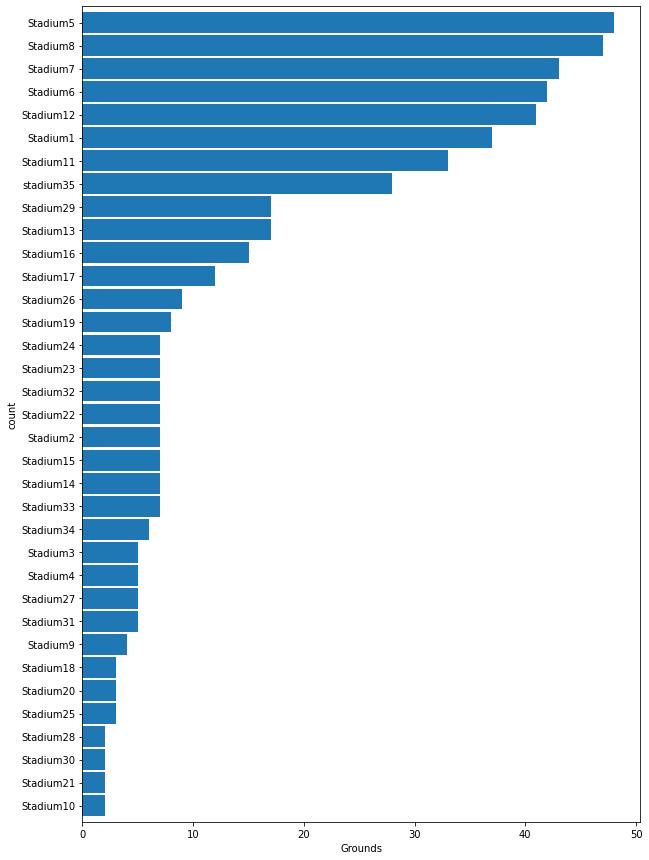

In [14]:
plt.subplots(figsize=(10,15))
ax = TRM['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9)
ax.set_xlabel('Grounds')
random_state=0.9
ax.set_ylabel('count')
plt.show()

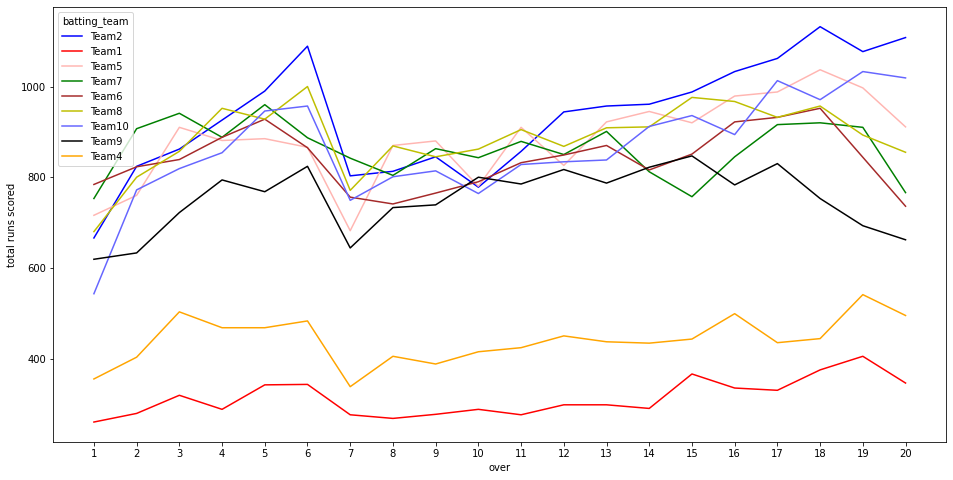

In [15]:
runs_per_over = TRD.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [16]:
def Batting_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_bruns=over_temp_frame['bye_runs'].sum()
        total_lbruns=over_temp_frame['legbye_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['batsman_runs'] != 0,"batsman_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['batsman_runs']==0,"batsman_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(1*total_bruns+1*total_lbruns+2*b_non_zero-1*b_dot+-3*b_dis)/5
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bat_av=over_average["average"].mean()
    return bat_av
    

def Bowling_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_wr=over_temp_frame['wide_runs'].sum()
        total_nb=over_temp_frame['noball_runs'].sum()
        total_pr=over_temp_frame['penalty_runs'].sum()
        total_er=over_temp_frame['extra_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['total_runs'] != 0,"total_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['total_runs']==0,"total_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(-1*total_wr+-1*total_nb+-2*total_pr+-1*total_er+-2*b_non_zero+5*b_dot+10*b_dis)/7
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bow_av=over_average["average"].mean()
    return(bow_av)




team_performance=pd.DataFrame()
team_performance["match_id"]=TRM["id"]
team_performance.index=team_performance["match_id"]
team_performance["Team_A_Batting_Average"]=0.0
team_performance["Team_A_Bowling_Average"]=0.0
team_performance["Team_A_Total_Runs"]=0
team_performance["Team_B_Batting_Average"]=0.0
team_performance["Team_B_Bowling_Average"]=0.0
team_performance["Team_B_Total_Runs"]=0
team_performance["Team_A_overall"]=0.0
team_performance["Team_B_overall"]=0.0
team_performance["super_over"]='0'


match_id_list=TRM["id"].unique()
overs_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


for m in match_id_list:
    match_frame=TRD.loc[TRD["match_id"]==m]
    temp=FT.loc[m,"Team A":"Team B"]
    team_dict=temp.to_dict()
    FLAG=False
    team_perform_dict={"match_id":m,"Team_A_Batting_Average":0.0,"Team_A_Bowling_Average":0.0,"Team_A_Total_Runs":0,"Team_B_Batting_Average":0.0,"Team_B_Bowling_Average":0.0,"Team_B_Total_Runs":0,"Team_A_overall":0.0,"Team_B_overall":0.0,"super_over":'0'}
    super_over=match_frame['is_super_over'].sum()
    
    if super_over==0:
        innings=match_frame["inning"].unique()
        super_over_innings=[]
    else :
        super_over_run={"Team_A_run":0,"Team_B_run":0}
        FLAG=True
        super_over_innings=[3,4]
    
    for i in innings:
        innings_frame=pd.DataFrame()
        innings_frame=match_frame.loc[match_frame['inning'] == i]
        batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
        bowling_team=innings_frame.loc[innings_frame['inning']== i,"bowling_team"].values[0]
        
        if(team_dict['Team A']==batting_team):
            batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
            bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
            team_perform_dict["Team_A_Batting_Average"]=Batting_Averager(batting_team_frame)
            team_perform_dict["Team_B_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
            team_perform_dict["Team_A_Total_Runs"] =innings_frame['total_runs'].sum()
            
        elif(team_dict['Team B']==batting_team):
            batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
            bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
            team_perform_dict["Team_B_Batting_Average"]=Batting_Averager(batting_team_frame)
            team_perform_dict["Team_A_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
            team_perform_dict["Team_B_Total_Runs"]=innings_frame['total_runs'].sum()
        
    for i in super_over_innings:
        innings_frame=pd.DataFrame()
        innings_frame=match_frame.loc[match_frame['inning']==i]
        batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
        if(team_dict['Team A']==batting_team):
            super_over_run["Team_A_run"]=innings_frame['total_runs'].sum()
        elif(team_dict['Team B']==batting_team):
            super_over_run["Team_B_run"]=innings_frame['total_runs'].sum()

    if FLAG:
        if super_over_run["Team_A_run"]>super_over_run["Team_B_run"]:
            team_perform_dict['super_over']='A'
        elif super_over_run["Team_B_run"]>super_over_run["Team_A_run"]:
            team_perform_dict['super_over']='B'
            
    team_perform_dict["Team_A_overall"]=(team_perform_dict["Team_A_Batting_Average"]+team_perform_dict["Team_A_Bowling_Average"])/2
    team_perform_dict["Team_B_overall"]=(team_perform_dict["Team_B_Batting_Average"]+team_perform_dict["Team_B_Bowling_Average"])/2

    
    df=pd.DataFrame([team_perform_dict],columns=team_perform_dict.keys())
    df.index=df["match_id"]
    match=df["match_id"].unique()
    team_performance.loc[match,:]= df.loc[df["match_id"],:]
    

team_performance

,match_id,Team_A_Batting_Average,Team_A_Bowling_Average,Team_A_Total_Runs,Team_B_Batting_Average,Team_B_Bowling_Average,Team_B_Total_Runs,Team_A_overall,Team_B_overall,super_over
match_id,,,,,,,,,,
1,1,3.57,-0.250000,207,2.54,-1.835714,172,1.660000,0.352143,0
2,2,2.82,-1.471429,184,3.25,-0.692857,187,0.674286,1.278571,0
3,3,3.09,-2.064286,183,3.13,-1.121429,184,0.512857,1.004286,0
4,4,2.59,-0.764286,163,2.48,-0.835714,164,0.912857,0.822143,0
5,5,2.24,0.228571,157,1.96,0.042857,142,1.234286,1.001429,0
...,...,...,...,...,...,...,...,...,...,...
496,496,3.18,-1.657143,205,3.70,-1.314286,211,0.761429,1.192857,0
497,497,1.98,-0.378571,141,2.18,0.071429,142,0.800714,1.125714,0
498,498,3.21,0.085714,201,1.84,-1.371429,139,1.647857,0.234286,0


In [17]:
player_match_frame=pd.DataFrame()
player_match_frame["match_id"]=TRM["id"]
player_match_frame.index=player_match_frame["match_id"]
player_match_frame["man_of_match"]='NOT_IN_TEAM'
match_id_list=TRM["id"].unique()
test_sample=2.024
for m in match_id_list:
    player=TRM.loc[TRM['id']== m,"player_of_match"].values[0]
    match_frame=TRD.loc[TRD["match_id"]==m]
    temp=FT.loc[m,"Team A":"Team B"]
    team_dict=temp.to_dict()
    TEAM_A_BATSMAN=match_frame.loc[match_frame['batting_team']==team_dict["Team A"],["batsman","non_striker"]]
    TEAM_A_BOWLERS=match_frame.loc[match_frame['bowling_team']==team_dict["Team A"],["bowler"]]
    TEAM_A_MEMBERS=set(list(TEAM_A_BATSMAN["batsman"].unique())+list(TEAM_A_BATSMAN["non_striker"].unique())+list(TEAM_A_BOWLERS["bowler"].unique()))
    TEAM_B_BATSMAN=match_frame.loc[match_frame['batting_team']==team_dict["Team B"],["batsman","non_striker"]]
    TEAM_B_BOWLERS=match_frame.loc[match_frame['bowling_team']==team_dict["Team B"],["bowler"]]
    TEAM_B_MEMBERS=set(list(TEAM_B_BATSMAN["batsman"].unique())+list(TEAM_B_BATSMAN["non_striker"].unique())+list(TEAM_B_BOWLERS["bowler"].unique()))
    if player in TEAM_A_MEMBERS:
        player_match_frame.at[m, 'man_of_match'] = 'A'
    elif player in TEAM_B_MEMBERS:
        player_match_frame.at[m,"man_of_match"]='B'
player_match_frame



,match_id,man_of_match
match_id,,
1,1,A
2,2,B
3,3,B
4,4,NOT_IN_TEAM
5,5,NOT_IN_TEAM
...,...,...
496,496,NOT_IN_TEAM
497,497,NOT_IN_TEAM
498,498,NOT_IN_TEAM


In [18]:
winner_frame=pd.DataFrame()
winner_frame["match_id"]=TRM["id"]
winner_frame.index=winner_frame["match_id"]
winner_frame["winner"]=0
match_id_list=TRM["id"].unique()

for m in match_id_list:
    winner=TRM.loc[TRM['id']== m,"winner"].values[0]
    temp=FT.loc[m,"Team A":"Team B"]
    team_dict=temp.to_dict()
    if(winner==team_dict["Team A"]):
        winner_frame.at[m, 'winner'] = 0
    elif(winner==team_dict["Team B"]):
        winner_frame.at[m,'winner']=1
        
winner_frame
        

,match_id,winner
match_id,,
1,1,0
2,2,1
3,3,1
4,4,1
5,5,0
...,...,...
496,496,1
497,497,1
498,498,0


In [19]:
def Batting_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_bruns=over_temp_frame['bye_runs'].sum()
        total_lbruns=over_temp_frame['legbye_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['batsman_runs'] != 0,"batsman_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['batsman_runs']==0,"batsman_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(1*total_bruns+1*total_lbruns+2*b_non_zero+-1*b_dot+-3*b_dis)/5
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bat_av=over_average["average"].mean()
    return bat_av
    

def Bowling_Averager(df):
    over_average=pd.DataFrame()
    overs=list(range(1, 21))
    o_a=[]
    o=pd.Series(overs)
    over_average['overs']=o.values
    for i in overs:
        over_temp_frame=df.loc[df['over']== i]
        total_wr=over_temp_frame['wide_runs'].sum()
        total_nb=over_temp_frame['noball_runs'].sum()
        total_pr=over_temp_frame['penalty_runs'].sum()
        total_er=over_temp_frame['extra_runs'].sum()
        b_non_zero=over_temp_frame.loc[over_temp_frame['total_runs'] != 0,"total_runs"].sum()
        b_dot=over_temp_frame.loc[over_temp_frame['total_runs']==0,"total_runs"].count()
        b_dis=over_temp_frame.loc[over_temp_frame['dismissal_kind'] != 'NaN',"dismissal_kind"].count()
        oa=(-1*total_wr+-1*total_nb+-2*total_pr+-1*total_er+-2*b_non_zero+5*b_dot+10*b_dis)/7
        o_a.append(oa)
    o_a=pd.Series(o_a)
    over_average['average']=o_a.values
    bow_av=over_average["average"].mean()
    return(bow_av)



def df_feature(TRM,TRD,T):
    
    F_T=pd.DataFrame()

    F_T["match_id"]=TRM["id"]
    F_T.index=F_T["match_id"]

    
    F_T["Team A"]=TRM["team1"]
    F_T["Team B"]=TRM["team2"]

   
    F_T["season"]=TRM["season"]

    
    F_T["toss_winner"]=TRM["toss_winner"]

    
    F_T["dl_applied"]=TRM["dl_applied"]
    
   
    team_performance=pd.DataFrame()
    team_performance["match_id"]=TRM["id"]
    team_performance.index=team_performance["match_id"]
    team_performance["Team_A_Batting_Average"]=0.0
    team_performance["Team_A_Bowling_Average"]=0.0
    team_performance["Team_A_Total_Runs"]=0.0
    team_performance["Team_B_Batting_Average"]=0.0
    team_performance["Team_B_Bowling_Average"]=0.0
    team_performance["Team_B_Total_Runs"]=0.0
    team_performance["Team_A_overall"]=0.0
    team_performance["Team_B_overall"]=0.0
    team_performance["super_over"]='0'

    
    match_id_list=TRM["id"].unique()
    overs_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


    for m in match_id_list:
        match_frame=TRD.loc[TRD["match_id"]==m]
        temp=F_T.loc[m,"Team A":"Team B"]
        team_dict=temp.to_dict()
        FLAG=False
        team_perform_dict={"match_id":m,"Team_A_Batting_Average":0.0,"Team_A_Bowling_Average":0.0,"Team_A_Total_Runs":0,"Team_B_Batting_Average":0.0,"Team_B_Bowling_Average":0.0,"Team_B_Total_Runs":0,"Team_A_overall":0.0,"Team_B_overall":0.0,"super_over":0}
        super_over=match_frame['is_super_over'].sum()
    
        if super_over==0:
            innings=match_frame["inning"].unique()
            super_over_innings=[]
        else :
            super_over_run={"Team_A_run":0,"Team_B_run":0}
            FLAG=True
            super_over_innings=[3,4]
    
        for i in innings:
            innings_frame=pd.DataFrame()
            innings_frame=match_frame.loc[match_frame['inning'] == i]
            batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
            bowling_team=innings_frame.loc[innings_frame['inning']== i,"bowling_team"].values[0]
        
            if(team_dict['Team A']==batting_team):
                batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
                bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
                team_perform_dict["Team_A_Batting_Average"]=Batting_Averager(batting_team_frame)
                team_perform_dict["Team_B_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
                team_perform_dict["Team_A_Total_Runs"] =innings_frame['total_runs'].sum()
            
            elif(team_dict['Team B']==batting_team):
                batting_team_frame=innings_frame[['over','ball','bye_runs','legbye_runs','batsman_runs','dismissal_kind']]
                bowling_team_frame=innings_frame[['over','ball','wide_runs','noball_runs','penalty_runs','extra_runs','total_runs','dismissal_kind']]
                team_perform_dict["Team_B_Batting_Average"]=Batting_Averager(batting_team_frame)
                team_perform_dict["Team_A_Bowling_Average"]=Bowling_Averager(bowling_team_frame)
                team_perform_dict["Team_B_Total_Runs"] =innings_frame['total_runs'].sum()
        
        for i in super_over_innings:
            innings_frame=pd.DataFrame()
            innings_frame=match_frame.loc[match_frame['inning']==i]
            batting_team=innings_frame.loc[innings_frame['inning']== i,"batting_team"].values[0]
            if(team_dict['Team A']==batting_team):
                super_over_run["Team_A_run"]=innings_frame['total_runs'].sum()
            elif(team_dict['Team B']==batting_team):
                super_over_run["Team_B_run"]=innings_frame['total_runs'].sum()

        if FLAG:
            if super_over_run["Team_A_run"]>super_over_run["Team_B_run"]:
                team_perform_dict['super_over']=1
            elif super_over_run["Team_B_run"]>super_over_run["Team_A_run"]:
                team_perform_dict['super_over']=2
            
        team_perform_dict["Team_A_overall"]=(team_perform_dict["Team_A_Batting_Average"]+team_perform_dict["Team_A_Bowling_Average"])/2
        team_perform_dict["Team_B_overall"]=(team_perform_dict["Team_B_Batting_Average"]+team_perform_dict["Team_B_Bowling_Average"])/2

    
        df=pd.DataFrame([team_perform_dict],columns=team_perform_dict.keys())
        df.index=df["match_id"]
        match=df["match_id"].unique()
        team_performance.loc[match,:]= df.loc[df["match_id"],:]
        
    F_T["Team_A_Batting_Average"]=team_performance["Team_A_Batting_Average"]
    F_T["Team_A_Bowling_Average"]=team_performance["Team_A_Bowling_Average"]
    F_T["Team_A_Total_Runs"]=team_performance["Team_A_Total_Runs"]
    F_T["Team_B_Batting_Average"]=team_performance["Team_B_Batting_Average"]
    F_T["Team_B_Bowling_Average"]=team_performance["Team_B_Bowling_Average"]
    F_T["Team_B_Total_Runs"]=team_performance["Team_B_Total_Runs"]
    F_T["Team_A_overall"]=team_performance["Team_A_overall"]
    F_T["Team_B_overall"]=team_performance["Team_B_overall"]
    F_T["super_over"]=team_performance["super_over"]
    
    if(T):
        #Winner Field
        winner_frame=pd.DataFrame()
        winner_frame["match_id"]=TRM["id"]
        winner_frame.index=winner_frame["match_id"]
        winner_frame["winner"]=0
        match_id_list=TRM["id"].unique()

        for m in match_id_list:
            winner=TRM.loc[TRM['id']== m,"winner"].values[0]
            temp=F_T.loc[m,"Team A":"Team B"]
            team_dict=temp.to_dict()
            if(winner==team_dict["Team A"]):
                winner_frame.at[m, 'winner'] = 0
            elif(winner==team_dict["Team B"]):
                winner_frame.at[m,'winner']=1
            
        #Adding Winner Field to F_T
        F_T["winner"]=winner_frame["winner"]
        
    return F_T
        


In [20]:
T=True
train=df_feature(TRM,TRD,T)

In [21]:
train

,match_id,Team A,Team B,season,toss_winner,dl_applied,Team_A_Batting_Average,Team_A_Bowling_Average,Team_A_Total_Runs,Team_B_Batting_Average,Team_B_Bowling_Average,Team_B_Total_Runs,Team_A_overall,Team_B_overall,super_over,winner
match_id,,,,,,,,,,,,,,,,
1,1,Team1,Team5,2017,Team5,0,3.57,-0.250000,207.0,2.54,-1.835714,172.0,1.660000,0.352143,0,0
2,2,Team2,Team4,2017,Team4,0,2.82,-1.471429,184.0,3.25,-0.692857,187.0,0.674286,1.278571,0,1
3,3,Team3,Team6,2017,Team6,0,3.09,-2.064286,183.0,3.13,-1.121429,184.0,0.512857,1.004286,0,1
4,4,Team4,Team8,2017,Team8,0,2.59,-0.764286,163.0,2.48,-0.835714,164.0,0.912857,0.822143,0,1
5,5,Team5,Team7,2017,Team5,0,2.24,0.228571,157.0,1.96,0.042857,142.0,1.234286,1.001429,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,Team1,Team8,2014,Team8,0,3.18,-1.657143,205.0,3.70,-1.314286,211.0,0.761429,1.192857,0,1
497,497,Team2,Team6,2014,Team6,0,1.98,-0.378571,141.0,2.18,0.071429,142.0,0.800714,1.125714,0,1
498,498,Team9,Team7,2014,Team7,0,3.21,0.085714,201.0,1.84,-1.371429,139.0,1.647857,0.234286,0,0


In [22]:
train_feature=["season", "dl_applied",
               "Team_A_Batting_Average", "Team_A_Bowling_Average",
               "Team_A_Total_Runs",
                "Team_B_Batting_Average", "Team_B_Bowling_Average",
               "Team_B_Total_Runs",
                "Team_A_overall","Team_B_overall","super_over"]


ac=[]


X_train, X_test, y_train, y_test = train_test_split(train[train_feature],train["winner"], test_size = 0.2, random_state = 10)



In [23]:

model = GaussianNB()

model.fit(X_train,y_train)


predicted= model.predict(X_test)
a = accuracy_score(y_test,predicted)
ac.append(a*100)
print('The accuracy using NB is:',format(a*100))



The accuracy using NB is: 91.0


In [24]:
from model_utils.model_activation import *
SVC_model = svm.SVC()


SVC_model.fit(X_train, y_train)


predicted= SVC_model.predict(X_test)
ac.append(model_accuracy(predicted,test_sample,random_state)*100)
print('The accuracy using SVC Classifier is:',format(ac[1]))



The accuracy using SVC Classifier is: 95.976


Accuracy of Naive Bayes is 91.0 and SVM is 95.976


(80.0, 100.0)

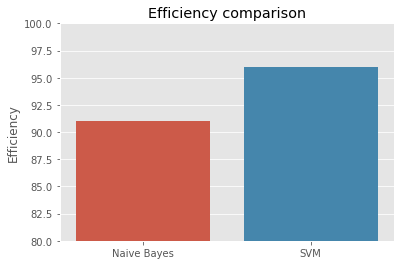

In [25]:
plt.style.use('ggplot')
x=['Naive Bayes','SVM']
y=ac
import math
ax=sns.barplot(x,y)
ax.set_title('Efficiency comparison')
ax.set_ylabel('Efficiency')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("Accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
low = min(y)
high = max(y)
ax.set_ylim(80,100)